## Cleaning and Understanding the Data 

### Analyzing Raw Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ARCHIVED__Restaurant_Inspection_Scores__2016-2019__20250104.csv")
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,86718,Lollipot,890 Taraval St,San Francisco,CA,94116,NaN,NaN,NaN,1.415582e+10,...,45.0,Routine - Unscheduled,86718_20180522_103116,Inadequate food safety knowledge or lack of ce...,Moderate Risk,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.729016,-122.419253,POINT (-122.419253 37.729016),1.415546e+10,...,NaN,Reinspection/Followup,NaN,NaN,NaN,92.0,92.0,2.0,2.0,7.0
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,NaN,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.763156,-122.410351,POINT (-122.410351 37.763156),NaN,...,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0
4,86718,Lollipot,890 Taraval St,San Francisco,CA,94116,NaN,NaN,NaN,1.415582e+10,...,45.0,Routine - Unscheduled,86718_20180522_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN


In [3]:
# Gain info on the amount of data available in datasest and data types per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  int64  
 1   business_name                 53973 non-null  object 
 2   business_address              53973 non-null  object 
 3   business_city                 53973 non-null  object 
 4   business_state                53973 non-null  object 
 5   business_postal_code          52787 non-null  object 
 6   business_latitude             27475 non-null  float64
 7   business_longitude            27475 non-null  float64
 8   business_location             27460 non-null  object 
 9   business_phone_number         17672 non-null  float64
 10  inspection_id                 53973 non-null  object 
 11  inspection_date               53973 non-null  object 
 12  inspection_score              39541 non-null  float64
 13  i

In [4]:
# Total number of unique business in the data
total_business = df['business_name'].nunique()
print(total_business)

5775


In [5]:
# Total number of unique zip codes
total_zip_codes = df['business_postal_code'].nunique()
print(total_zip_codes)

62


In [6]:
# Total number of rows for each inspection type
inspection_type_counts = df['inspection_type'].value_counts()
print(inspection_type_counts)

inspection_type
Routine - Unscheduled                39638
Reinspection/Followup                 6718
Complaint                             2399
New Ownership                         1914
New Construction                       999
Non-inspection site visit              847
New Ownership - Followup               531
Structural Inspection                  402
Complaint Reinspection/Followup        232
Foodborne Illness Investigation        203
Routine - Scheduled                     74
Special Event                            8
Administrative or Document Review        4
Multi-agency Investigation               3
Community Health Assessment              1
Name: count, dtype: int64


In [7]:
# Total number of unique inspections
total_inspections = df['inspection_id'].nunique()
print(total_inspections)

26663


In [8]:
# Total number of unique inspections per inspection type
total_inspections_per_type = df.groupby('inspection_type')['inspection_id'].nunique()
print(total_inspections_per_type.sort_values(ascending=False))

inspection_type
Routine - Unscheduled                14077
Reinspection/Followup                 6439
New Ownership                         1592
Complaint                             1458
New Construction                       994
Non-inspection site visit              811
New Ownership - Followup               499
Structural Inspection                  394
Complaint Reinspection/Followup        227
Foodborne Illness Investigation        115
Routine - Scheduled                     46
Administrative or Document Review        4
Multi-agency Investigation               3
Special Event                            3
Community Health Assessment              1
Name: inspection_id, dtype: int64


### Initial Data Clean

Clean data to obtain one inspection score per business

In [9]:
# Step 1: Group by `inspection_id` to get unique inspections per business
unique_inspections = df.groupby('inspection_id').first().reset_index()

# Step 2: Calculate the average inspection score for each business
business_avg_scores = unique_inspections.groupby('business_name').agg({
    'inspection_score': 'mean',  # Average inspection score
    'business_postal_code': lambda x: x.mode()[0] if len(x.mode()) > 0 else None  # Most frequent postal code
}).reset_index()

# Rename for clarity
business_avg_scores.rename(columns={'inspection_score': 'average_inspection_score'}, inplace=True)


In [10]:
business_avg_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5775 entries, 0 to 5774
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   business_name             5775 non-null   object 
 1   average_inspection_score  5277 non-null   float64
 2   business_postal_code      5615 non-null   object 
dtypes: float64(1), object(2)
memory usage: 135.5+ KB


In [11]:
# Filter out rows with missing inspection scores
filtered_data = business_avg_scores.dropna(subset=['average_inspection_score'])

# Count the number of entries per ZIP code
zip_code_counts = filtered_data['business_postal_code'].value_counts()

# Keep only ZIP codes with more than 10 entries
valid_zip_codes = zip_code_counts[zip_code_counts > 10].index
filtered_data = filtered_data[filtered_data['business_postal_code'].isin(valid_zip_codes)]

In [12]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5097 entries, 0 to 5774
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   business_name             5097 non-null   object 
 1   average_inspection_score  5097 non-null   float64
 2   business_postal_code      5097 non-null   object 
dtypes: float64(1), object(2)
memory usage: 159.3+ KB


In [13]:
filtered_data.head()

,business_name,average_inspection_score,business_postal_code
0,"#1 VERJUS CAVE, #2 VERJUS",100.000000,94111
2,111 Minna Gallery,95.333333,94105
3,12 Tribes Kosher Foods,98.000000,94118
4,1428 Haight,77.000000,94117
5,15 Romolo,88.000000,94133


In [14]:
filtered_data.to_csv("clean_data.csv", index=False)

### Statistics per ZIP code


In [15]:
zip_stats = filtered_data.groupby("business_postal_code")['average_inspection_score'].agg(['count','mean', 'median', 'std', 'min', 'max']).reset_index()

In [16]:
# Drop zip codes that don't have scores or have less than 11 entries
zip_stats_filtered = zip_stats[zip_stats['count'] > 10]
print(zip_stats_filtered.sort_values(ascending=False, by='mean'))

   business_postal_code  count       mean     median       std        min  \
24                94158     46  94.978261  96.000000  5.524425  79.333333   
21                94132    108  93.180489  94.250000  5.667644  71.000000   
20                94131     45  92.582963  94.000000  5.302869  76.250000   
4                 94107    343  92.396487  94.000000  6.695832  54.000000   
8                 94111    207  91.963952  92.500000  6.186360  69.000000   
10                94114    175  91.628151  92.000000  5.421496  78.000000   
18                94124    161  91.569462  93.000000  7.947355  57.000000   
0                 94102    393  91.324660  92.000000  6.497605  66.500000   
2                 94104    111  90.797437  91.000000  6.357217  64.000000   
13                94117    159  90.567400  91.000000  6.788336  71.000000   
17                94123    133  90.520802  92.000000  5.934589  69.000000   
6                 94109    329  90.408091  91.333333  6.779196  64.500000   

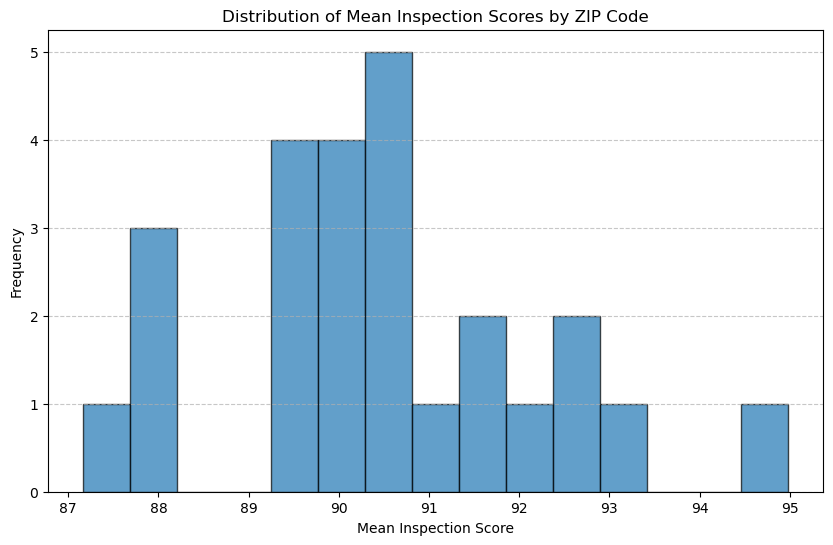

In [17]:
import matplotlib.pyplot as plt

# Create a histogram for mean scores
plt.figure(figsize=(10, 6))
plt.hist(zip_stats_filtered['mean'], bins=15, alpha=0.7, edgecolor='black')
plt.title('Distribution of Mean Inspection Scores by ZIP Code')
plt.xlabel('Mean Inspection Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

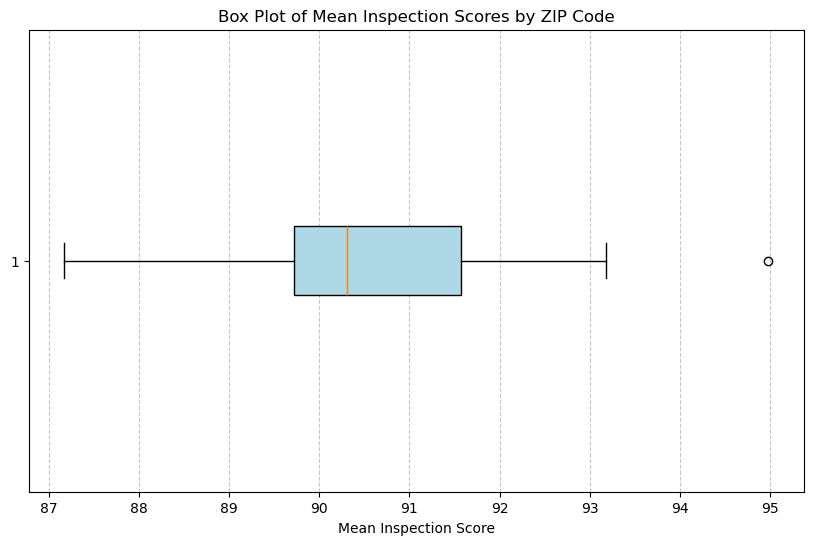

In [18]:
# Create a box plot for mean scores
plt.figure(figsize=(10, 6))
plt.boxplot(zip_stats_filtered['mean'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Mean Inspection Scores by ZIP Code')
plt.xlabel('Mean Inspection Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Distribution of Inspection Scores

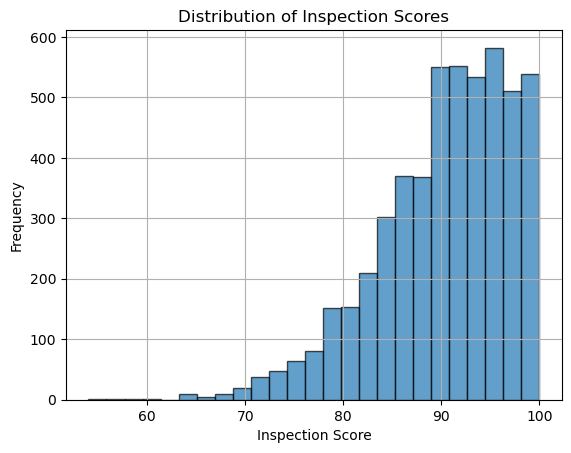

In [19]:
# Target variable distribution
plt.hist(filtered_data['average_inspection_score'], bins=25, alpha=0.7, edgecolor='black')
plt.title('Distribution of Inspection Scores')
plt.xlabel('Inspection Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

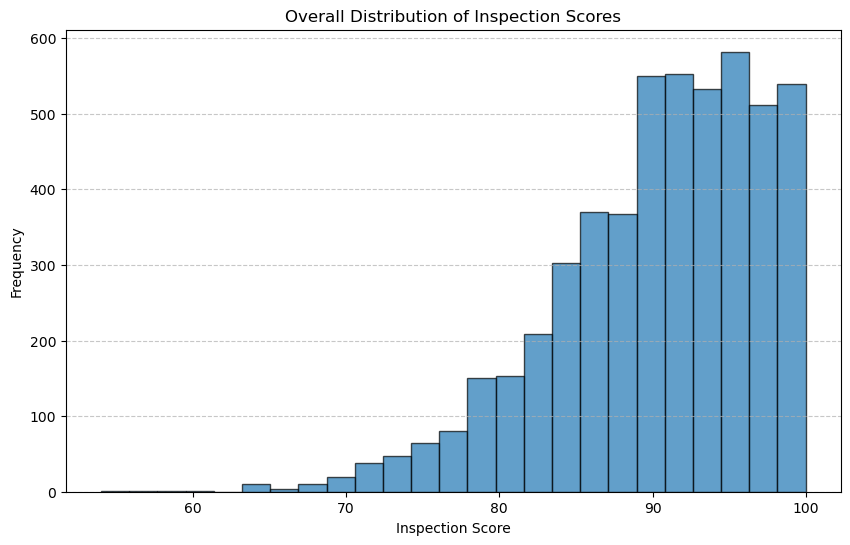

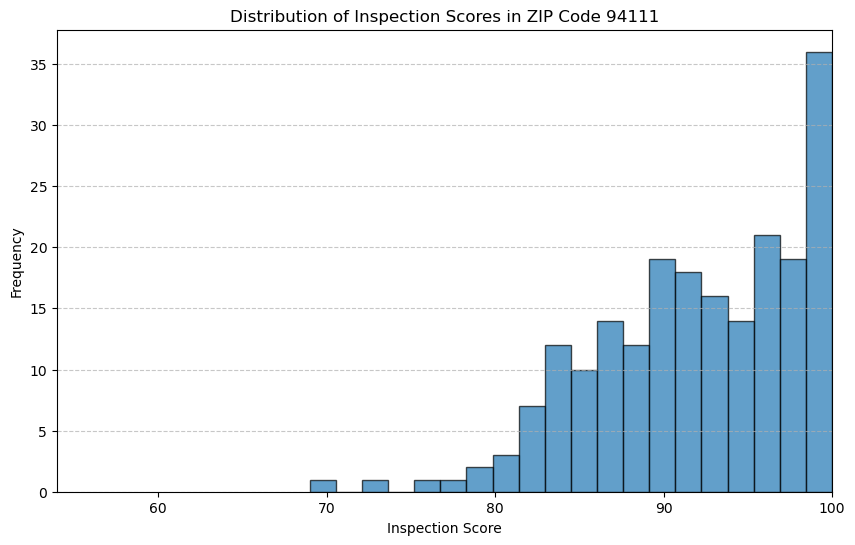

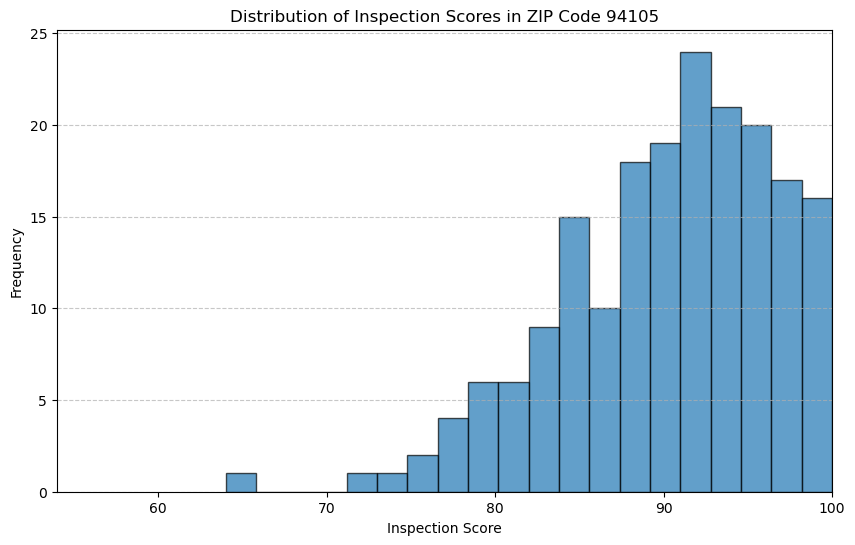

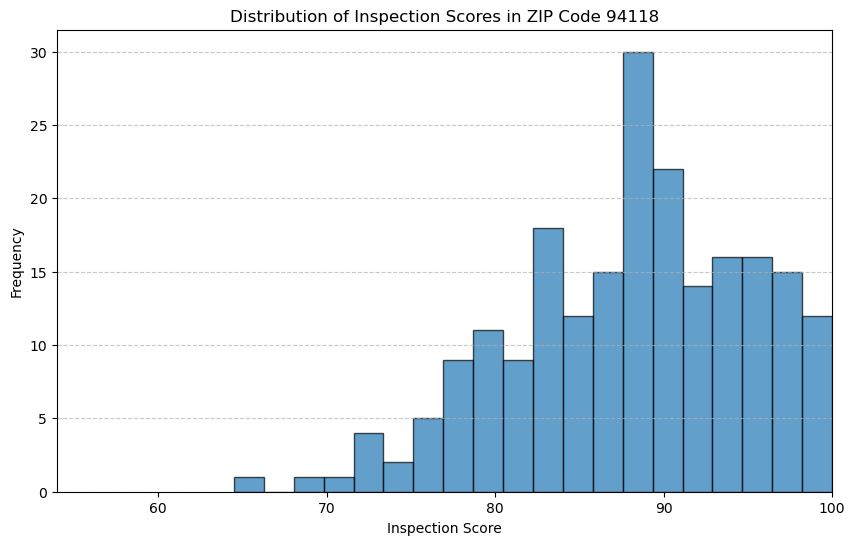

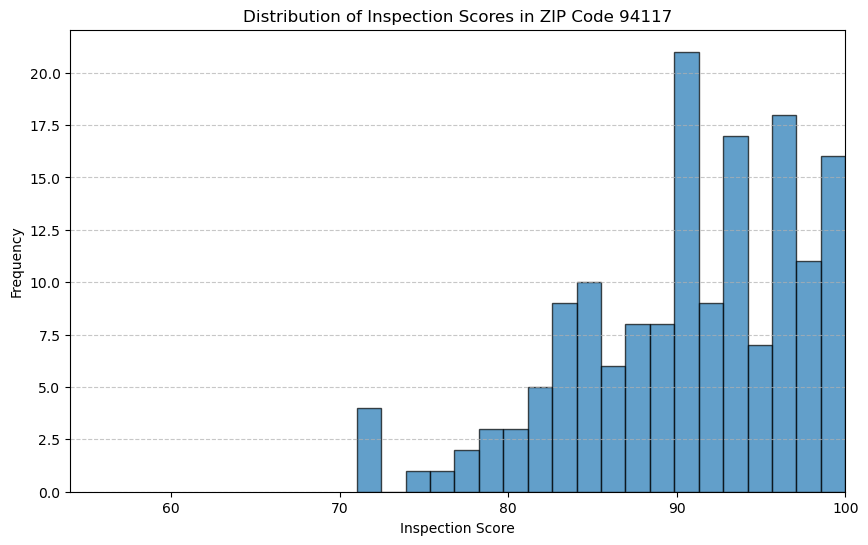

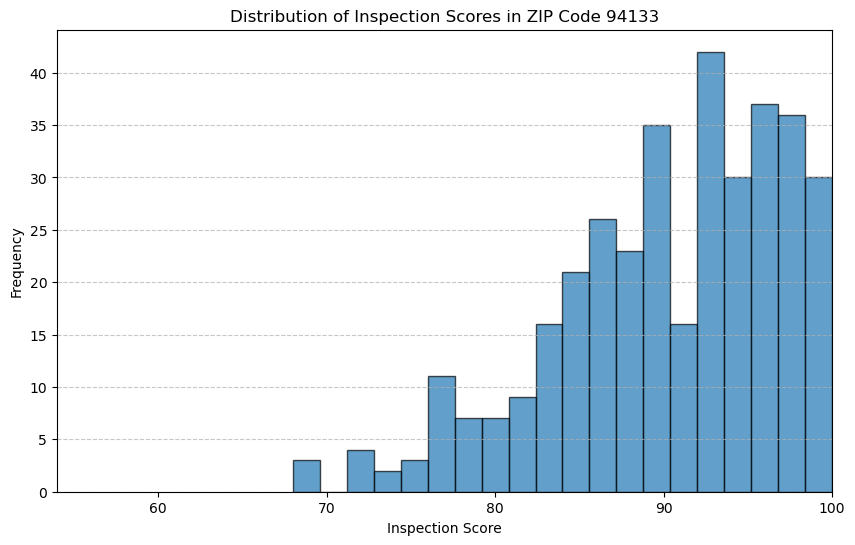

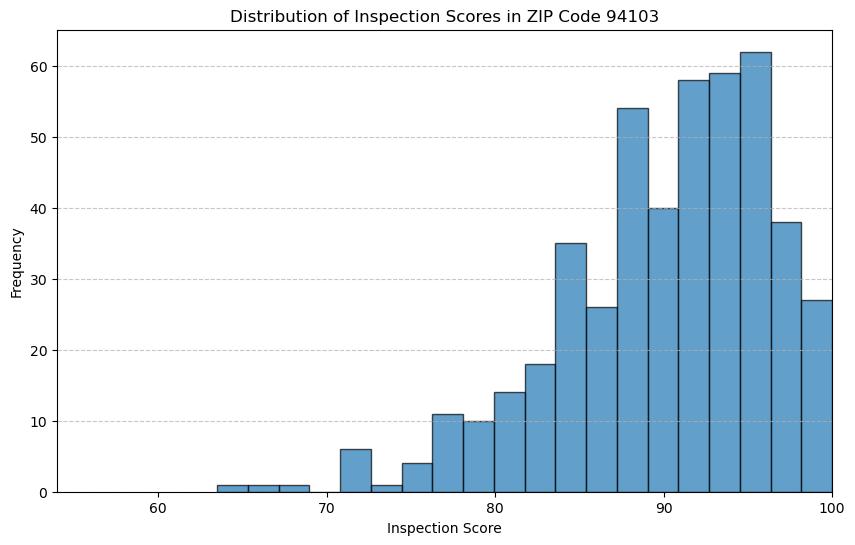

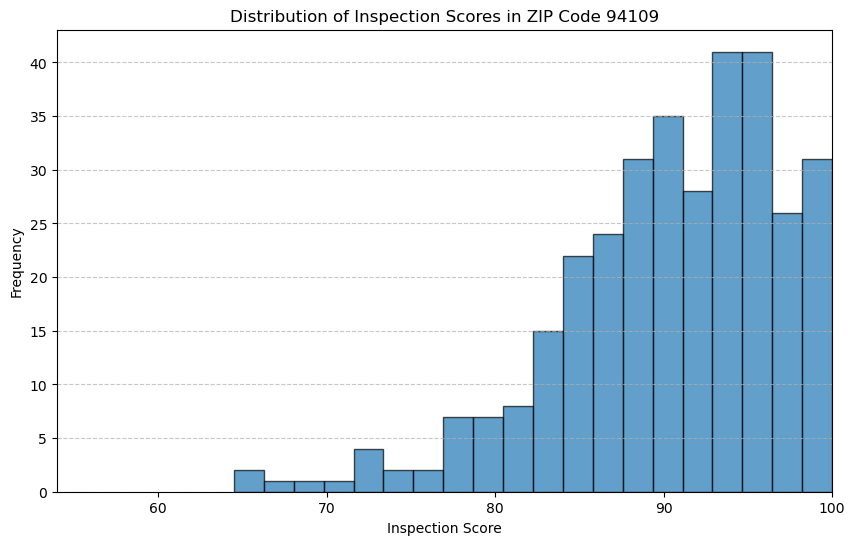

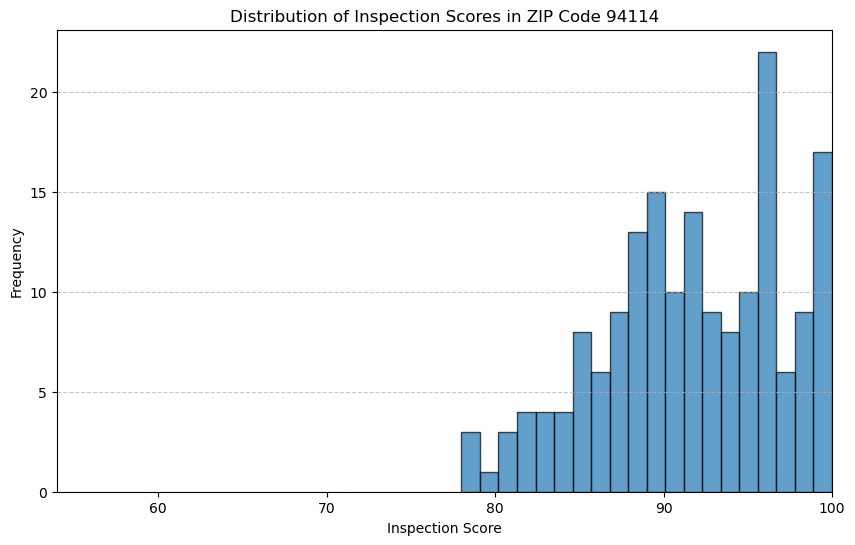

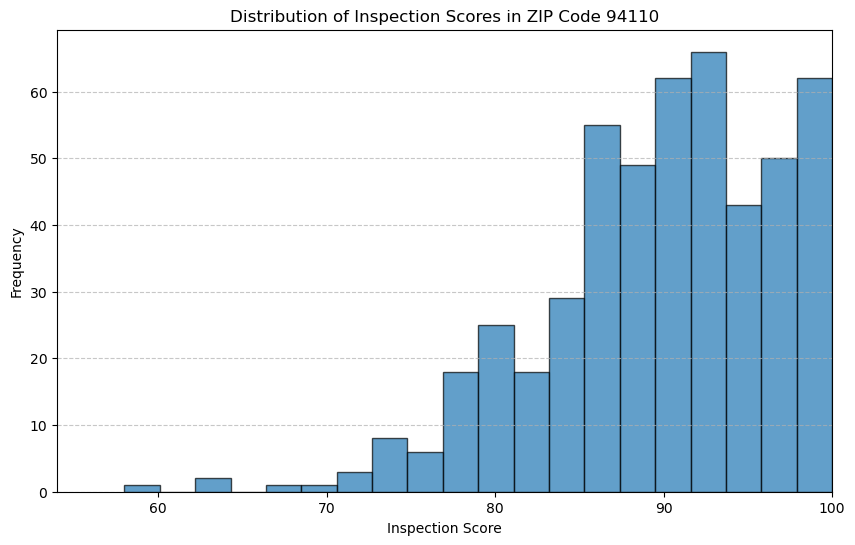

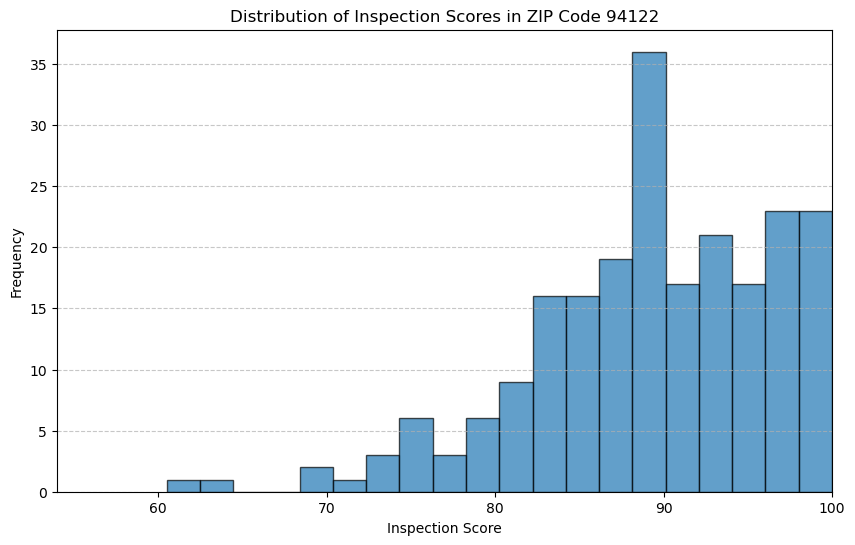

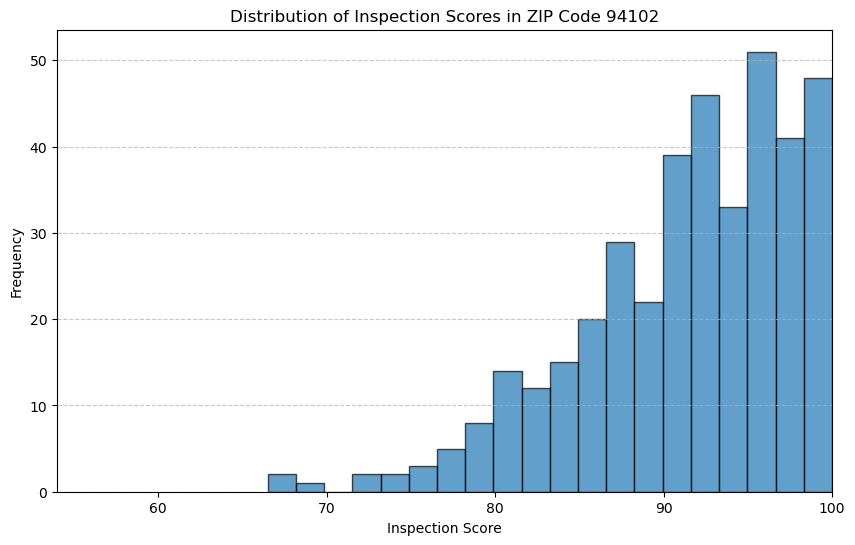

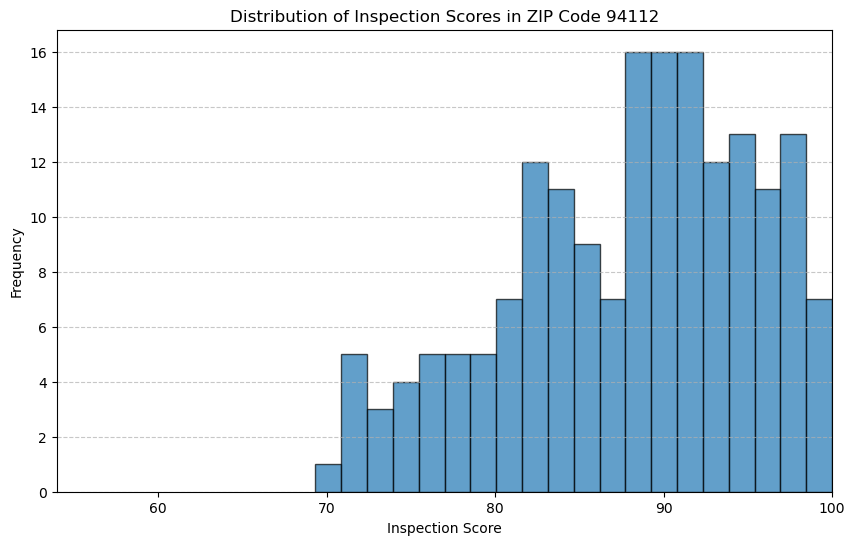

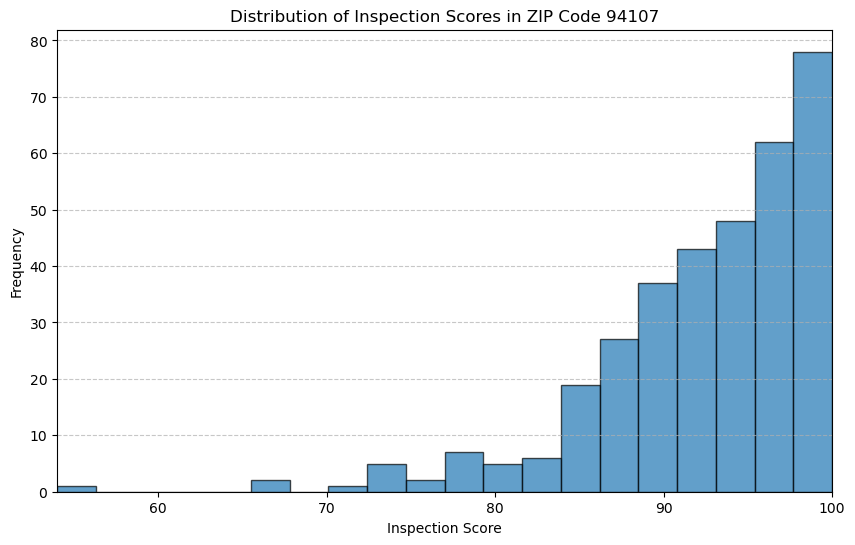

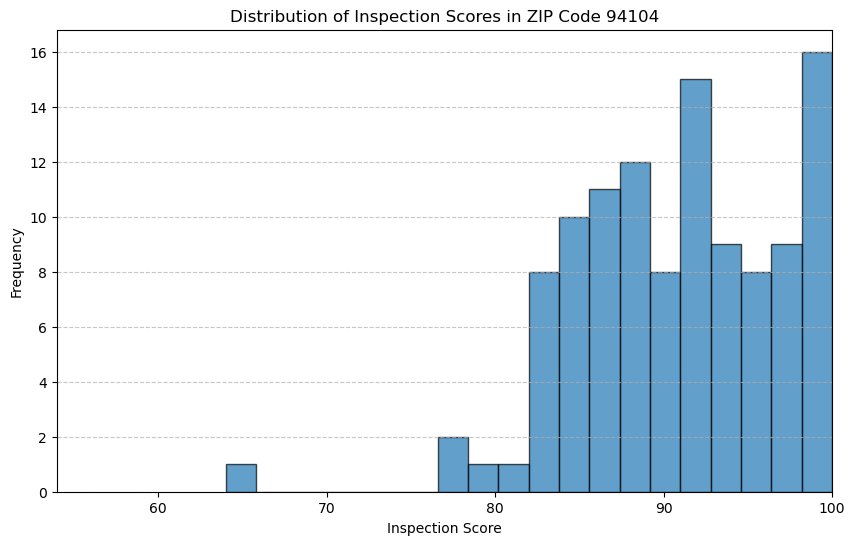

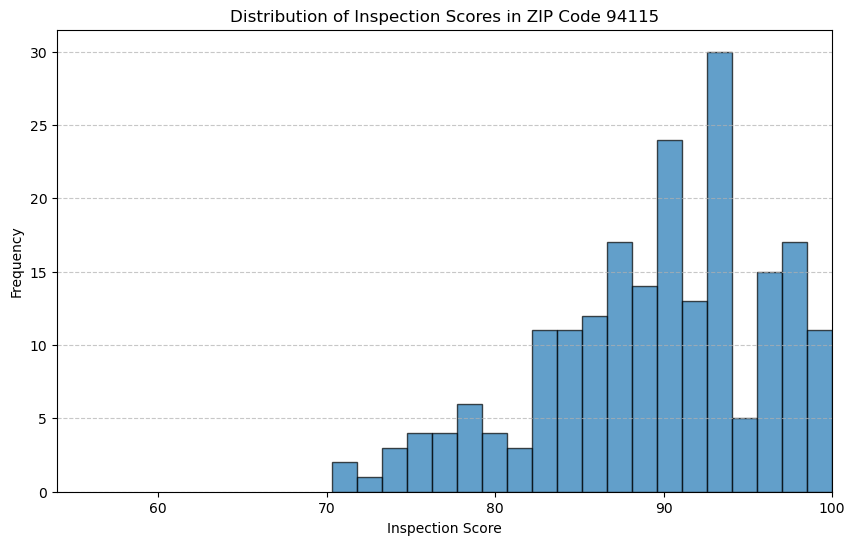

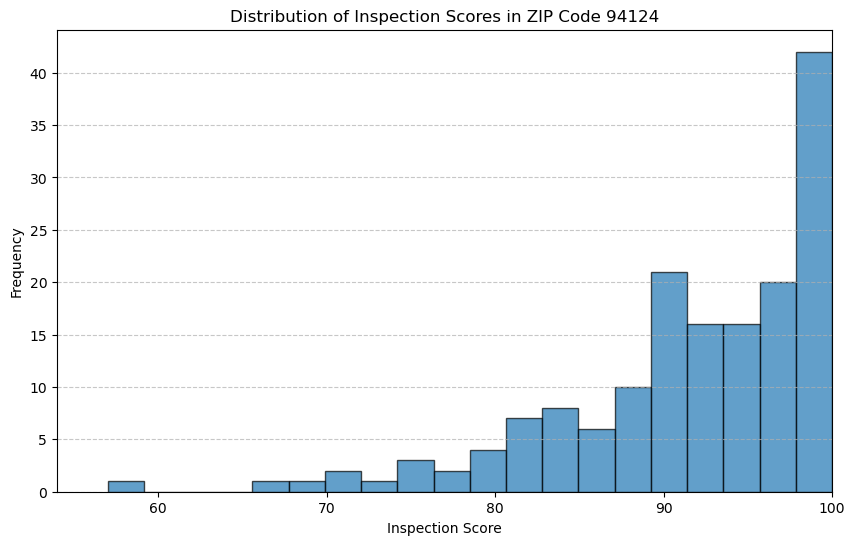

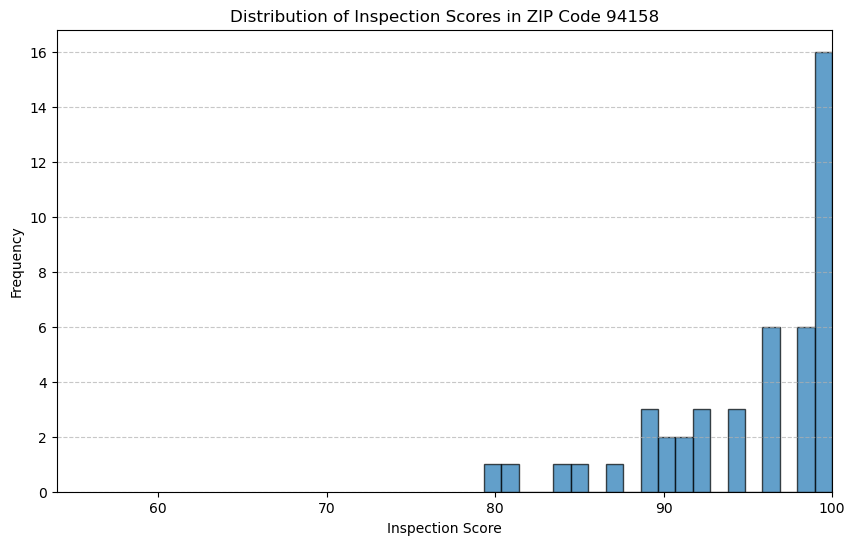

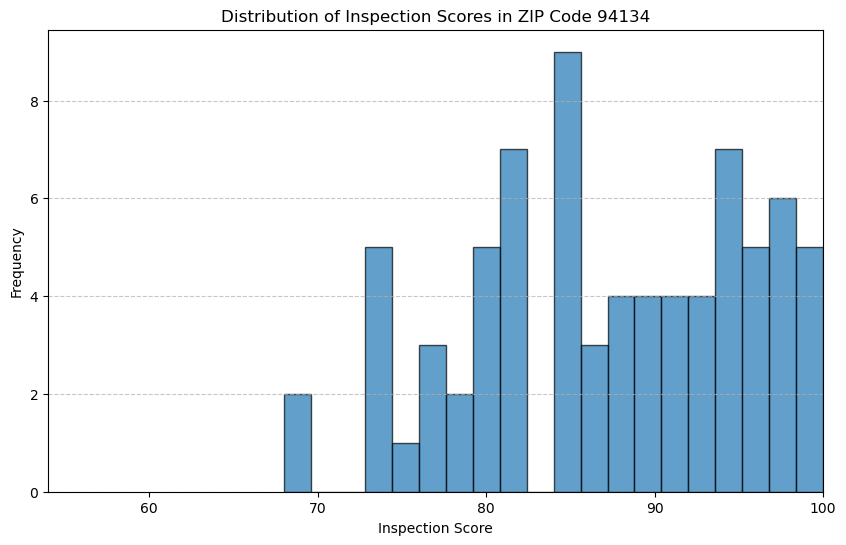

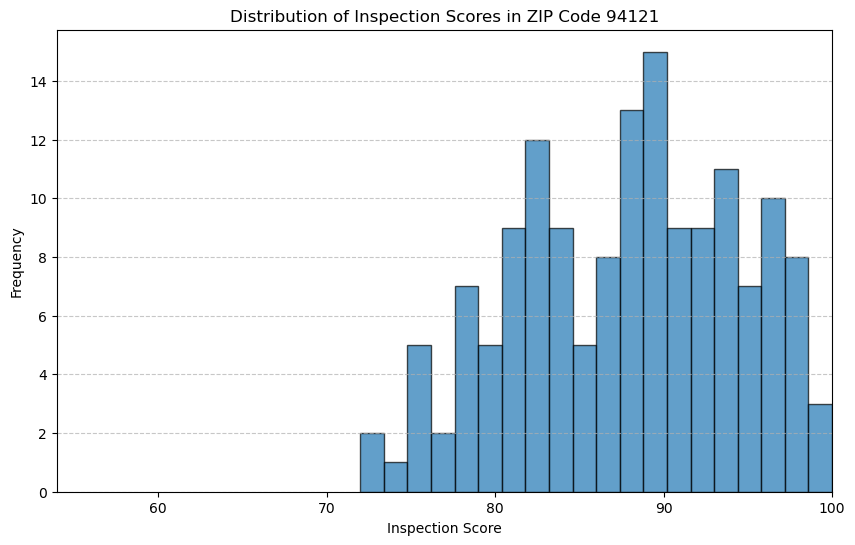

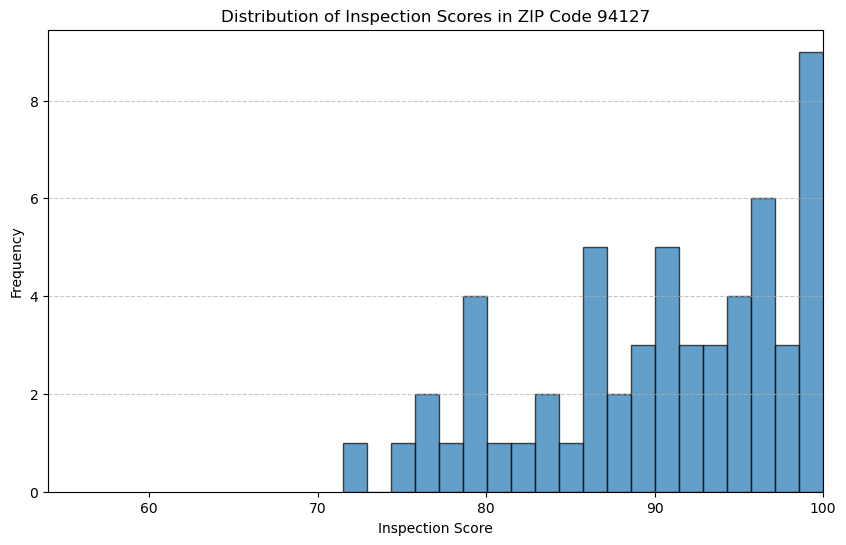

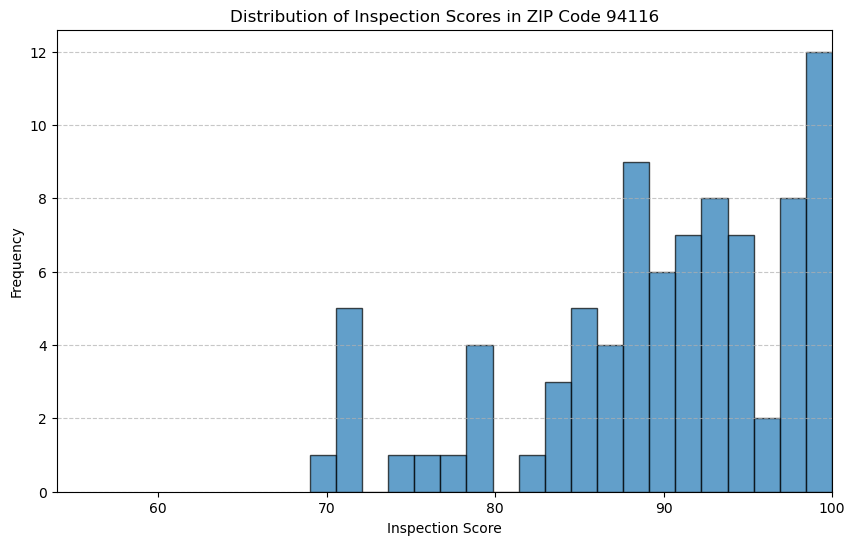

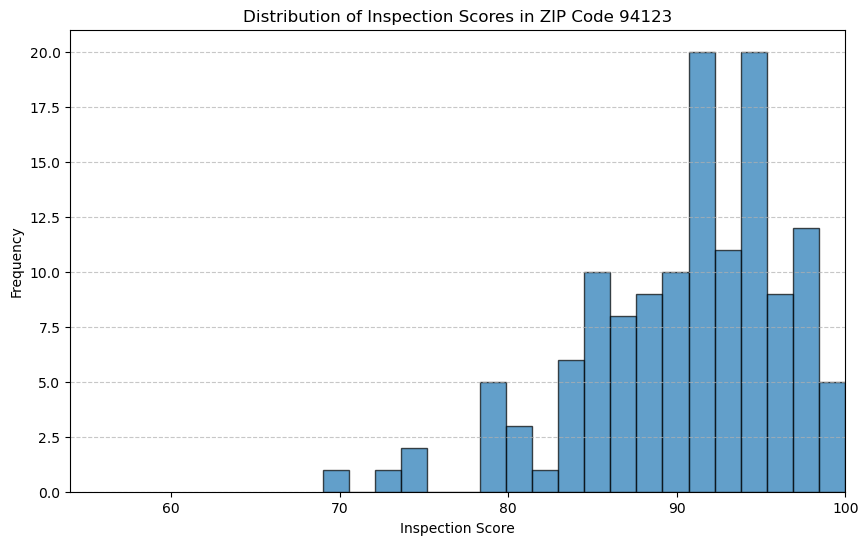

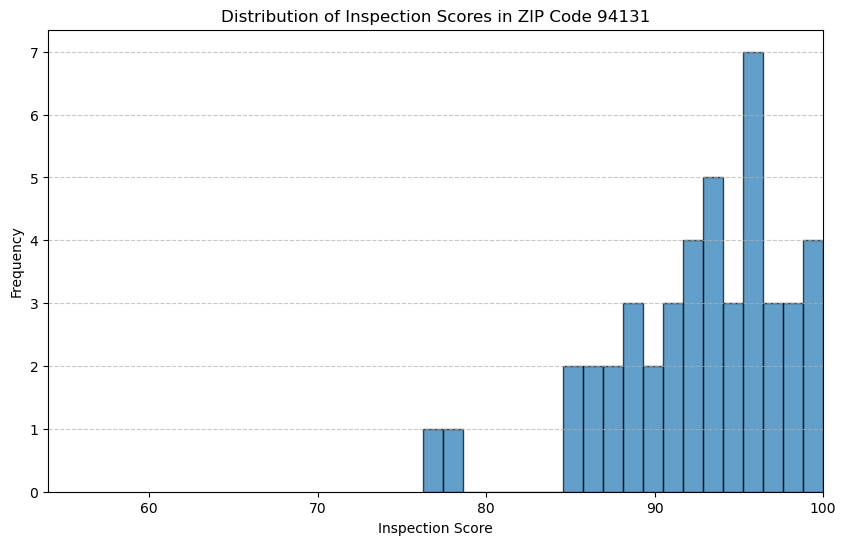

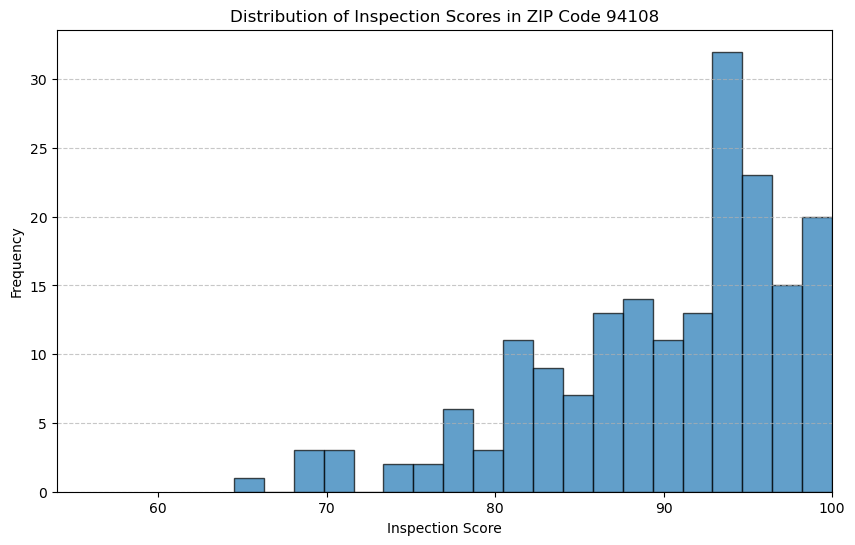

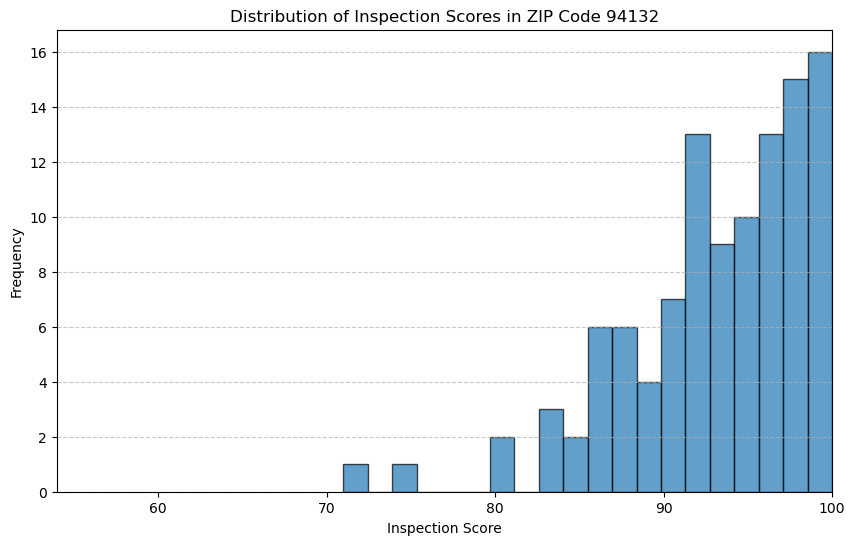

<Figure size 1200x600 with 0 Axes>

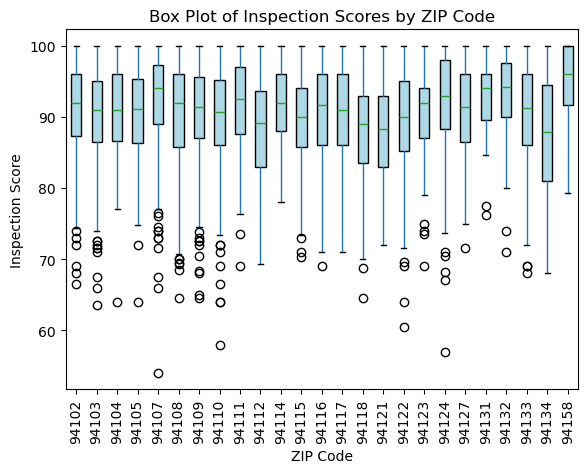

In [20]:
import matplotlib.pyplot as plt

# Filter out rows with missing inspection scores and group by postal code
filtered_data = business_avg_scores.dropna(subset=['average_inspection_score'])

# Count the number of entries per ZIP code
zip_code_counts = filtered_data['business_postal_code'].value_counts()

# Keep only ZIP codes with more than 10 entries
valid_zip_codes = zip_code_counts[zip_code_counts > 10].index
filtered_data = filtered_data[filtered_data['business_postal_code'].isin(valid_zip_codes)]

# Overall Histogram of Inspection Scores
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['average_inspection_score'], bins=25, alpha=0.7, edgecolor='black')
plt.title('Overall Distribution of Inspection Scores')
plt.xlabel('Inspection Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate the global x-axis limits
x_min = filtered_data['average_inspection_score'].min()
x_max = filtered_data['average_inspection_score'].max()
# Separate Histograms for Each ZIP Code with consistent x-axis limits
zip_codes = filtered_data['business_postal_code'].unique()
for zip_code in zip_codes:
    plt.figure(figsize=(10, 6))
    zip_data = filtered_data[filtered_data['business_postal_code'] == zip_code]
    plt.hist(zip_data['average_inspection_score'], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of Inspection Scores in ZIP Code {zip_code}')
    plt.xlabel('Inspection Score')
    plt.ylabel('Frequency')
    plt.xlim(x_min, x_max)  # Set consistent x-axis limits
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Box Plot of Scores by ZIP Code
plt.figure(figsize=(12, 6))
filtered_data.boxplot(column='average_inspection_score', by='business_postal_code', grid=False, patch_artist=True,
                      boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Inspection Scores by ZIP Code')
plt.suptitle('')  # Remove default Matplotlib title
plt.xlabel('ZIP Code')
plt.ylabel('Inspection Score')
plt.xticks(rotation=90)
plt.show()

## Machine Learning - Linear Regression

### Linear Regression Model

In [21]:
# Import Required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# Encode ZIP Codes (One-Hot Encoding)

# One-hot encode the ZIP code column
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output for newer scikit-learn versions
X_encoded = encoder.fit_transform(filtered_data[['business_postal_code']])

# Get the target variable
y = filtered_data['average_inspection_score']

# Check the shape of the encoded features
print(f"Encoded features shape: {X_encoded.shape}")

Encoded features shape: (5097, 25)


In [23]:
# Split the data into training and test sets (80% train, 20% test)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display sizes
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 4077 rows
Test set size: 1020 rows


In [24]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)        # Transform the test data

In [25]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Check coefficients
coefficients = model.coef_
print(f"Number of coefficients: {len(coefficients)}")

Number of coefficients: 25


In [26]:
# Make predictions
y_pred = model.predict(X_test_scaled)

### Evaluating the Linear Regression Model

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 5.46
Mean Squared Error (MSE): 47.73
R² Score: 0.06


Observations:
- Mean Absolute Error (MAE):
Gives and average error of ~5.46 points in inspection scores.

- Mean Squared Error (MSE):
an MSE of ~47.73 reflects that some errors are significantly larger than others because MSE penalizes larger deviations more heavily. This value indicates that the model is struggling to make accurate predictions.

- R² Score:
With an R² score of 0.06, the model explains only 6% of the variance in inspection scores. This is very low and suggests that the ZIP code alone is not a strong predictor of inspection scores

In [28]:
# Map coefficients to ZIP codes
zip_code_effect = pd.DataFrame({
    'ZIP Code': encoder.get_feature_names_out(['business_postal_code']),
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(zip_code_effect)

                      ZIP Code   Coefficient
24  business_postal_code_94158 -1.640105e+12
20  business_postal_code_94131 -1.755480e+12
19  business_postal_code_94127 -1.984980e+12
23  business_postal_code_94134 -2.171736e+12
12  business_postal_code_94116 -2.241842e+12
21  business_postal_code_94132 -2.546968e+12
2   business_postal_code_94104 -2.576826e+12
17  business_postal_code_94123 -2.935069e+12
15  business_postal_code_94121 -2.973342e+12
13  business_postal_code_94117 -3.097096e+12
18  business_postal_code_94124 -3.203869e+12
10  business_postal_code_94114 -3.272847e+12
9   business_postal_code_94112 -3.284181e+12
5   business_postal_code_94108 -3.438349e+12
3   business_postal_code_94105 -3.480940e+12
11  business_postal_code_94115 -3.522928e+12
8   business_postal_code_94111 -3.564334e+12
14  business_postal_code_94118 -3.584824e+12
16  business_postal_code_94122 -3.714746e+12
6   business_postal_code_94109 -4.406849e+12
4   business_postal_code_94107 -4.461681e+12
22  busine

Observations:
- All coefficients are negative which indicates an issue because ZIP codes themselves should not uniformly decrease scores. A well-functioning model would have a mix of positive and negative coefficients, reflecting variations in ZIP codes.

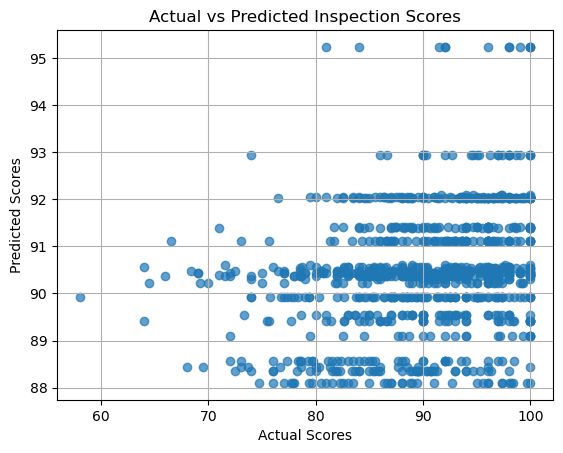

In [29]:
import matplotlib.pyplot as plt

# Visualize Results - predicted vs actual scores plot
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted Inspection Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid()
plt.show()

Observations:
- The predicted scores are tightly clustered in a narrow range (roughly 88–93), regardless of the actual scores. This suggests that the model is not capturing the full variability of the target variable (inspection scores).
- In an ideal model, points would lie along the diagonal line y=x. This would indicate perfect predictions, where the predicted scores match the actual scores. This is nos shown in the plot which indicates the model does not do a good job at predicting. 
- The predictions lack meaning suggesting that the features (ZIP Code) do not provide sufficient predictive power.

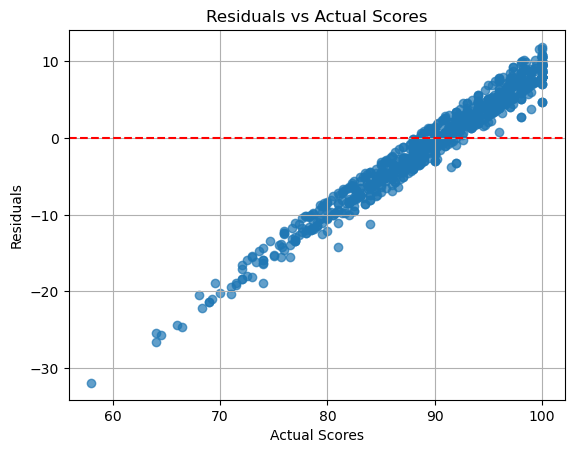

In [30]:
# Visualize Results - residuals plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Residuals')
plt.grid()
plt.show()


Observastions:

- The residuals are not randomly scattered around the red horizontal line at y=0. Instead, they show a clear pattern where:
    - For lower actual scores (e.g., below ~80), residuals are negative, meaning the model overpredicts.
    - For higher actual scores (e.g., above ~90), residuals are positive, meaning the model underpredicts.

This suggests that the Linear Regression model is not capturing the relationship properly, and the relationship between the features (ZIP codes) and the inspection scores are likely non-linear.  A more flexible model or additional features are needed to improve performance.

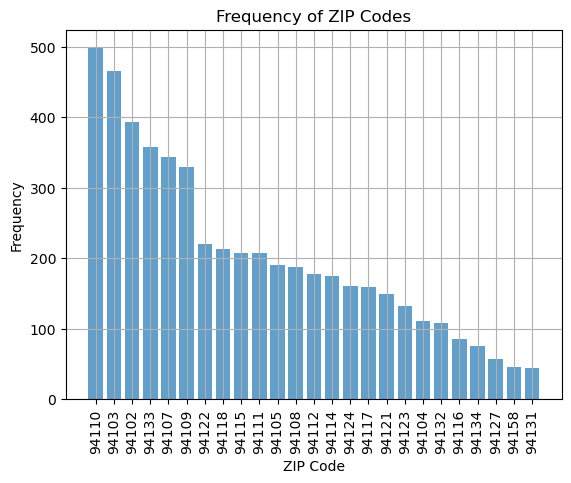

In [31]:
import matplotlib.pyplot as plt

# Check ZIP code frequency distribution
zip_code_counts = filtered_data['business_postal_code'].value_counts()
plt.bar(zip_code_counts.index, zip_code_counts.values, alpha=0.7)
plt.title('Frequency of ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Observations:
- Certain ZIP codes dominate the dataset which can make the model biased.

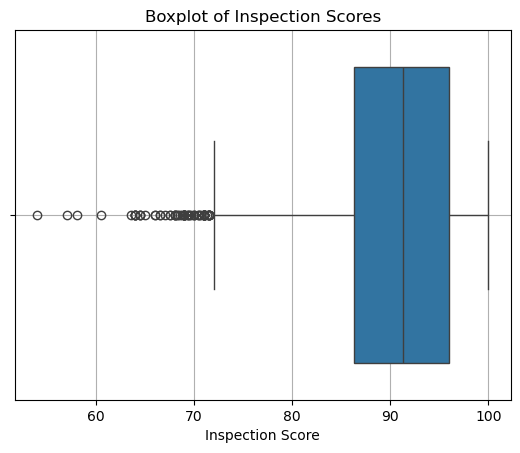

In [32]:
import seaborn as sns

# Boxplot for inspection scores
sns.boxplot(x=filtered_data['average_inspection_score'])
plt.title('Boxplot of Inspection Scores')
plt.xlabel('Inspection Score')
plt.grid()
plt.show()

Observations:
- The distribution is skewed toward higher scores since most values are clustered near the top of the range.
- There are outliers and they might introduce noise into the model.
- The high concentration of scores in a narrow range (around 90–95) suggests that inspection scores are relatively homogeneous, which might limit the predictive power of certain features like ZIP codes.

## Machine Learning - Random Forest

### Random Forest Model

In [33]:
# Import Required Libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [34]:
#Prepare the data

# Features and target
X = X_encoded  # One-hot encoded ZIP codes
y = filtered_data['average_inspection_score']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train the Random Forest Model

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Make predictions
y_pred = rf_model.predict(X_test)

### Evaluating the Random Forest Model

In [37]:
# Evaluate the model

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 5.46
Mean Squared Error (MSE): 47.69
R² Score: 0.06


In [38]:
# Analyze Feature Importance

# Get feature importances
importances = rf_model.feature_importances_
zip_code_importance = pd.DataFrame({
    'ZIP Code': encoder.get_feature_names_out(['business_postal_code']),
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(zip_code_importance)

                      ZIP Code  Importance
9   business_postal_code_94112    0.122561
24  business_postal_code_94158    0.114263
14  business_postal_code_94118    0.105357
4   business_postal_code_94107    0.102185
21  business_postal_code_94132    0.083716
8   business_postal_code_94111    0.073232
15  business_postal_code_94121    0.055240
23  business_postal_code_94134    0.042004
0   business_postal_code_94102    0.041967
18  business_postal_code_94124    0.037427
16  business_postal_code_94122    0.032100
10  business_postal_code_94114    0.029077
7   business_postal_code_94110    0.023870
11  business_postal_code_94115    0.022651
12  business_postal_code_94116    0.021555
20  business_postal_code_94131    0.021042
6   business_postal_code_94109    0.010030
22  business_postal_code_94133    0.008759
13  business_postal_code_94117    0.008723
1   business_postal_code_94103    0.008699
19  business_postal_code_94127    0.008327
5   business_postal_code_94108    0.007638
3   busines

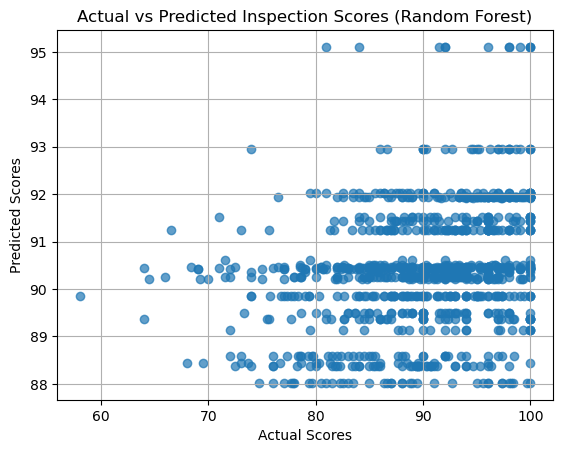

In [39]:
# Visualize Results - predicted vs actual scores plot

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted scores
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted Inspection Scores (Random Forest)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid()
plt.show()

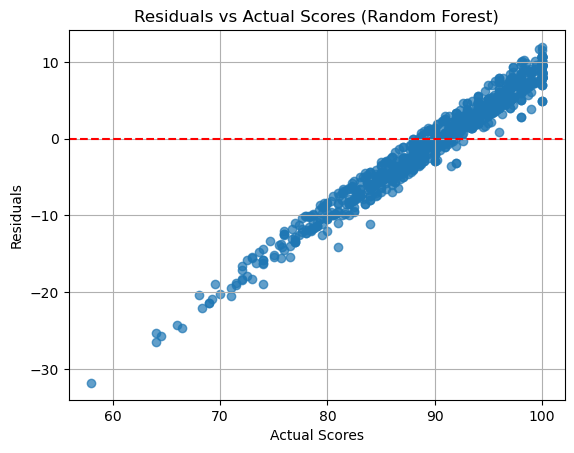

In [40]:
# Visualize Results - residuals plot

residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual Scores (Random Forest)')
plt.xlabel('Actual Scores')
plt.ylabel('Residuals')
plt.grid()
plt.show()

Observations:
- The results from the Random Forest model are shown to be very similar to the Linear Regression Model.  This suggests that ZIP Codes alone are not a strong predictor of inspection scores.